In [1]:
import matplotlib.pyplot as plt
import numpy as np
from numpy import ma
from matplotlib import ticker, cm
import math

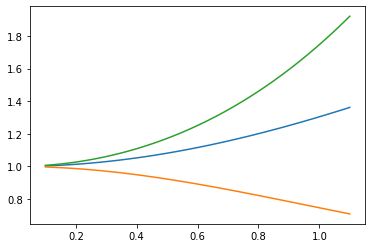

In [9]:
t=np.linspace(0.1,1.1,100)
R=np.zeros((100,),dtype=float)
y=np.zeros((100,),dtype=float)
rate=np.zeros((100,),dtype=float)
for i in range(100):
    R[i]=0.5*(math.pi**0.5*(t[i]+0.5/t[i])*math.erf(t[i])+math.exp(-(t[i]**2)))
    y[i]=0.5*math.pi**0.5/t[i]*math.erf(t[i])
    rate[i]=R[i]/y[i]
plt.plot(t,R)
plt.plot(t,y)
plt.plot(t,rate)

In [74]:
h=np.array([300,600,800,828,1000])
d=np.array([800,1172,1328,1340,1500])
theta1=np.array([10,20,30,40,50,60,70,80])
theta2=np.array([8,15.5,22.5,29,35,40.5,45.5,50])
z=np.array([0,6,12,18])
n=np.array([1880,940,530,305])
alpha=np.linspace(1.15e-16,1.25e-16,100)
beta=np.linspace(1840,1850,100)
chisq=np.zeros((len(alpha),len(beta)))

def fun(x,alpha,beta):
    return alpha*(x**beta);
def fun1(theta,r):
    return (180/math.pi)*math.asin(math.sin(theta*math.pi/180)/r);
def fun2(z,k,v0):
    um=0.0001
    r=0.52*um
    deltarho=0.063
    g=980
    T=293
    E=4/3*math.pi*(r**3)*deltarho*g*z*um
    return v0*math.exp(-E/(k*T))

for i in np.arange(len(alpha)):
    for j in np.arange(len(beta)):
        for l in np.arange(len(z)):
            v=fun2(z[l],alpha[i],beta[j])
            chisq[i,j]+=((n[l]-v)**2)/(v)
            #chisq[i,j]+=n[l]*math.log(v)-v


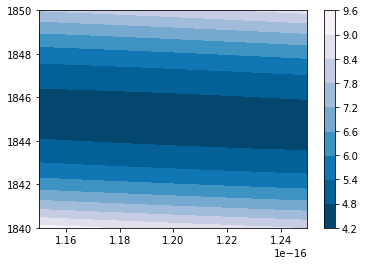

In [75]:
fig, ax = plt.subplots()
cs = ax.contourf(alpha, beta, chisq,  cmap=cm.PuBu_r)
#locator=ticker.LogLocator(),
# Alternatively, you can manually set the levels
# and the norm:
# lev_exp = np.arange(np.floor(np.log10(z.min())-1),
#                    np.ceil(np.log10(z.max())+1))
# levs = np.power(10, lev_exp)
# cs = ax.contourf(X, Y, z, levs, norm=colors.LogNorm())

cbar = fig.colorbar(cs)

plt.show()

In [76]:

A=np.array([[5.1, 4.1, 3.1, 2.1],
       [1.1, 0.1, 0.9, 1.9]])
y=np.unravel_index(np.argmin(chisq),chisq.shape)#获得最小值的索引
print(y)
print(chisq[y])
print(alpha[y[0]],print(beta[y[1]]))

(49, 54)
4.568850799035676
1845.4545454545455
1.1994949494949495e-16 None


In [5]:
from scipy import stats
chisquare=300
freedom_degree=197

p_value=1.0-stats.chi2.cdf(chisquare,freedom_degree)
print(p_value)

3.080986767267646e-06


In [4]:
n=2
N=10
n=n
a=stats.f.ppf(0.159,2*n,2*(N-n+1))
plo=n*a/(N-n+1+n*(a))

print(plo)

0.07205052578060986


In [8]:
N=10
a=stats.chi2.ppf(0.9,(N))
print(a)

15.987179172105265


In [11]:
a=0.5*stats.chi2.ppf(1-0.159,2*(N+1))
print(a)

4.6345507336608875


In [7]:
stats.poisson.ppf(1-0.00135,mu=0.3)

3.0

In [15]:
from scipy import stats

Nobs1=np.zeros((100000,))
Nobs2=np.zeros((100000,))
mean=np.zeros((100000,))
for i in range(100000):
    mean[i]=0.01*i+500
    Nobs1[i]=stats.poisson.ppf(1-0.00135, mean[i])
    Nobs2[i]=stats.poisson.ppf(0.5, 1.087*mean[i])



1223.25


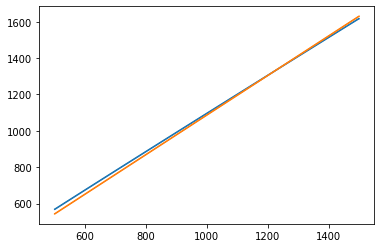

In [17]:
plt.plot(mean,Nobs1,mean,Nobs2)
for i in range(100000):
    if(Nobs1[i]<Nobs2[i]):
        print(mean[i])
        break